In [10]:
import networkx as nx

In [11]:
G = nx.read_gpickle('20150902_all_ird Final Graph.pkl')

In [12]:
len(G.nodes())

18632

In [13]:
G.nodes()[0]

'A/swine/Ohio/10SW125/2010'

In [14]:
len(G.edges())

27373

In [15]:
# Check to make sure that all sources are before the sink.
for sc, sk, d in G.edges(data=True):
    sc_time = G.node[sc]['collection_date']
    sk_time = G.node[sk]['collection_date']
    
    assert sc_time < sk_time

/home/ericmjl/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


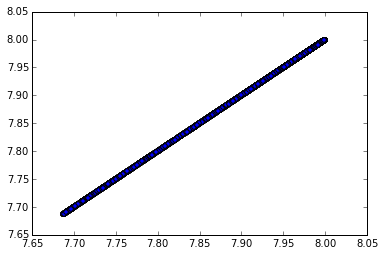

In [16]:
# Check to make sure that the sum of PWI values equals the computed PWI value.
import numpy as np
summed = []
individual = []

for sc, sk, d in G.edges(data=True):
    if d['edge_type'] == 'full_complement':
        summed.append(d['pwi'])
        individual.append(sum(d['segments'].values()))

import matplotlib.pyplot as plt

%matplotlib inline
plt.scatter(summed, individual)

In [17]:
# Check to make sure that the sum of PWI values equals the computed PWI value.
summed = []
individual = []

for sc, sk, d in G.edges(data=True):
    if d['edge_type'] == 'full_complement':
        summed = d['pwi']
        assert sum(d['segments'].values()) == d['pwi'], print(d['pwi'], sum(d['segments'].values()), sc, sk)

In [18]:
G.edges(data=True)[0]

('A/black duck/Ohio/161/1999',
 'A/mallard/Minnesota/249/2000',
 {'edge_type': 'full_complement',
  'pwi': 7.700856000000001,
  'segments': {1: 0.95248500000000003,
   2: 0.93464100000000006,
   3: 0.95630400000000004,
   4: 0.96699500000000005,
   5: 0.968607,
   6: 0.97187100000000004,
   7: 0.98387100000000005,
   8: 0.966082}})